        C1/C2   Wet_Mean
58   0.155280  67.033333
59   0.508142  70.433333
60   0.257295  41.533333
62   0.387424  66.933333
63   0.276891  43.633333
..        ...        ...
209  0.351037   4.566667
210  0.423453  71.300000
211  0.257563  63.066667
212  0.331507   5.866667
213  0.341560   6.400000

[140 rows x 2 columns]
The average silhouette_score is : 0.4177342554240246
Number of clusters formed is :  11


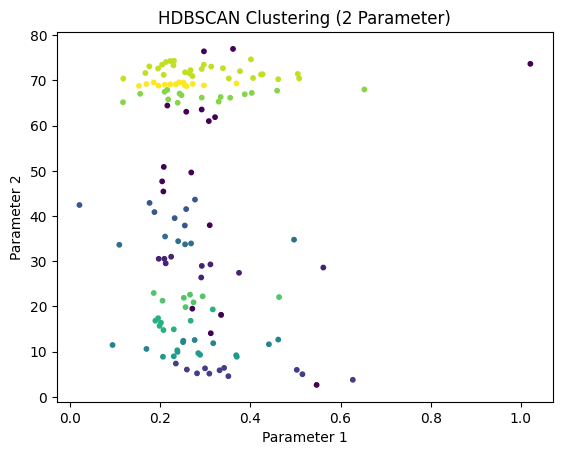

In [57]:
import pandas as pd
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D

# Load the CSV file into a DataFrame with headers and specify encoding
csv = pd.read_csv('Aggregated_data_E2.csv', encoding='latin1')

#create two dataframes from dataset
df=csv
df2=csv

#setup columns of interest
columns = [17, 18] #clustering parameters
columns2 = [1, 2, 17, 18, 45, 108] #paramters of interest, 1 = Condition, 2 = Time, 17=Ion Leakage, 18 = Soil Moisture, 45 = Mean RWC, 108 = Mean Leaef Thickness

#filter df and df2 according to columns
df = df.iloc[:, columns]
df2 = df2.iloc[:, columns2] 

#remove rows that don't have values for all clustering parameters
df = df.dropna()

# Display the DataFrame
print(df)

# Perform HDBSCAN clustering
## https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
#clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, metric='hamming', alpha=1.0) #hdbscan using hamming distance instead of Euclidean (unused)
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3, metric='euclidean', alpha=1.0) #change 'min_cluster_size' and 'min_samples' to control clusters formed
clusters = clusterer.fit_predict(df)

# Compute silhouette score
silhouette_avg = silhouette_score(df, clusters)
print("The average silhouette_score is :", silhouette_avg)

# Apply PCA for dimensionality reduction (for 3 parameters and up)
#pca = PCA(n_components=2)
#components = pca.fit_transform(df)

#print number of clusters formed
unique_clusters = np.unique(clusters)
print("Number of clusters formed is : ", len(unique_clusters)-1) #-1 to account for noise cluster, which has a value of '-1' in 'clusters'

#Filter time column to plot clusters against
cluster_times = df2.loc[df.index]

# Create a scatter plot of the clustered data
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='viridis', marker='o', s=10)
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
plt.title('HDBSCAN Clustering (2 Parameter)')

plt.show()


[-1 -1  0 -1  0 -1 -1  0  0  0  0  0  0  0  0  0  0 -1 -1  0 -1 -1  0 -1
  0  0 -1 -1 -1 -1  0 -1 -1  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1  0  0  0 -1
 -1  0 -1 -1  0  0  0 -1  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0
 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1]


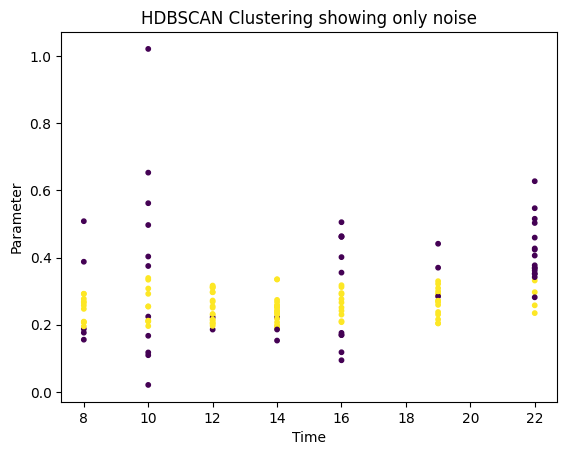

In [43]:
#Code to visualise noise vs not noise from previous figure
##NOTE: running this code makes you need to rerun the previous cell to make later parts work.
single_clus = clusters

#change all non-noise cluster values to 0
single_clus[~np.isin(single_clus, [-1])] = 0
print(single_clus)

#alternative code for visualising individual clusters
#cluster_of_interest = 5
#single_clus[single_clus != cluster_of_interest] = 0 

plt.scatter(cluster_times.iloc[:,0], df.iloc[:, 0], c=clusters, cmap='viridis', marker='o', s=10)
plt.xlabel('Time')
plt.ylabel('Parameter')
plt.title('HDBSCAN Clustering showing only noise')

plt.show()

In [47]:
#Code to see data of inidividual clusters
df_filtered0 = df[clusters == 0] # control
df_filtered1 = df[clusters == 1] # drought8-10
df_filtered2 = df[clusters == 2] # drought8-16
df_filtered3 = df[clusters == 3] # drought
df_filtered4 = df[clusters == 4] # mix
df_filtered5 = df[clusters == 5] # 
df_filtered6 = df[clusters == 6]
df_filtered7 = df[clusters == 7]
df_filtered8 = df[clusters == 8]
df_filtered9 = df[clusters == 9]
df_filtered10 = df[clusters == 10]


In [31]:
# Display the filtered DataFrame
csv_filtered = csv.loc[df_filtered0.index]

# Display the filtered DataFrame
print(csv_filtered)

Standard Deviation of 'Wet_Mean' column: 0.009718259850817142
         Date Condition  Time  Tray Plant   Hour_m1  µS/cm_m1  °C_m1  \
80   20240121   Drought    10   4.0     A  21:31:40     5.553   21.7   
161  20240127   Control    16  11.0     N  22:50:35    21.930   21.4   
175  20240130   Drought    19   2.0     O  20:46:15    29.490   21.3   
197  20240202   Control    22   3.0     L  19:18:50    67.570   21.2   
201  20240202   Control    22   7.0     L  19:23:21    45.550   21.4   
206  20240202   Control    22  11.0     E  19:33:32    22.550   21.3   
207  20240202   Drought    22  12.0     L  19:34:32    16.810   21.3   
208  20240202   Control    22  13.0     F  19:35:42    24.590   21.3   
209  20240202   Drought    22  14.0     F  19:36:52    12.690   21.5   

    Temp.Comp._m1  Offset_m1  ...  Mean_NPQt Mean_Phi2  Mean_PhiNO  \
80           ATC2        0.0  ...     0.9670    0.6460      0.1800   
161          ATC2        0.0  ...     0.8940    0.6375      0.1915   
175    

In [56]:
#Code to find standard deviation of a parameter of a cluster
std_column = 'Wet_Mean'
std_dev = csv_filtered[std_column].std()

print("Standard Deviation of", std_column, "column:", std_dev)

Standard Deviation of Wet_Mean column: 5.945091503107175


In [66]:
#Loop for finding all standard deviations of a parameters for all clusters
for i in range(0,len(unique_clusters)-1):
    df_filtered = df[clusters == i]
    csv_filtered = csv.loc[df_filtered.index]
    std_column = 'Wet_Mean' #parameter of interest
    std_dev = csv_filtered[std_column].std()

    print("Standard Deviation of", std_column, "column for cluster", i, ":", std_dev)


Standard Deviation of Wet_Mean column for cluster 0 : 4.001230361900307
Standard Deviation of Wet_Mean column for cluster 1 : 1.2570436469736546
Standard Deviation of Wet_Mean column for cluster 2 : 0.7059797529779557
Standard Deviation of Wet_Mean column for cluster 3 : 2.6350463261605754
Standard Deviation of Wet_Mean column for cluster 4 : 1.1704304342056442
Standard Deviation of Wet_Mean column for cluster 5 : 0.9905105305256588
Standard Deviation of Wet_Mean column for cluster 6 : 0.6835800956512961
Standard Deviation of Wet_Mean column for cluster 7 : 0.4121822166778941
Standard Deviation of Wet_Mean column for cluster 8 : 0.6946621869257358
Standard Deviation of Wet_Mean column for cluster 9 : 1.296481467824967


    Condition  Time     C1/C2   Wet_Mean  Mean RWC  Mean_Thickness
0     Control     1       NaN  66.366667  0.851852             NaN
1     Control     1       NaN  55.766667  0.875000             NaN
2     Control     1       NaN  69.200000       NaN             NaN
3     Control     1       NaN  67.166667       NaN             NaN
4     Control     1       NaN  69.100000  0.833333             NaN
..        ...   ...       ...        ...       ...             ...
209   Drought    22  0.351037   4.566667  0.682620           0.165
210   Control    22  0.423453  71.300000  0.785317           0.525
211   Control    22  0.257563  63.066667  0.776834           0.230
212   Drought    22  0.331507   5.866667  0.686819           0.215
213   Drought    22  0.341560   6.400000  0.713454           0.195

[214 rows x 6 columns]


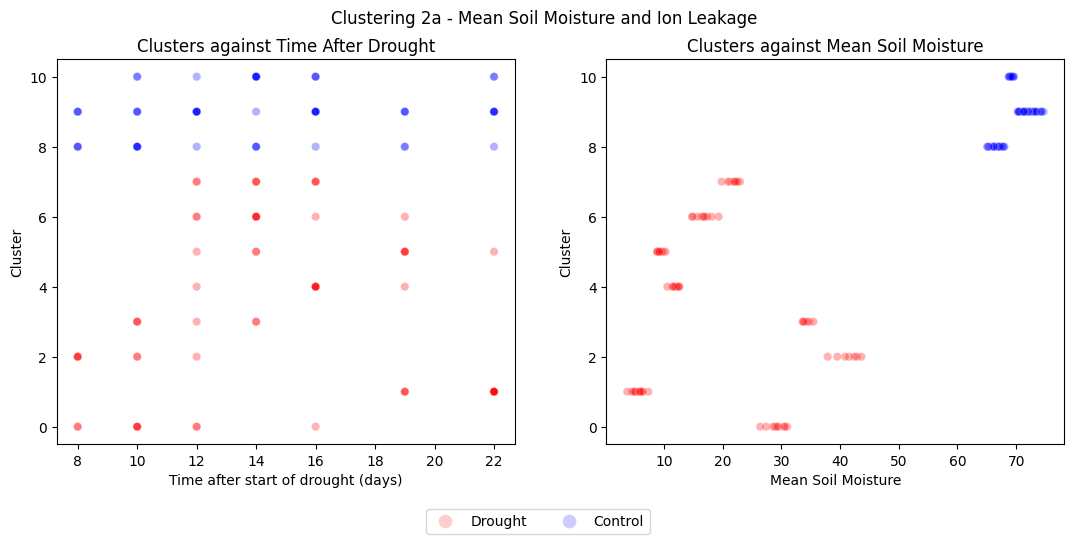

In [11]:
#Code for visualising clusters against a parameter
#Setup figures
fig, axes = plt.subplots(1, 2,  figsize=(13, 5))
fig.suptitle('Clustering 2a - Mean Soil Moisture and Ion Leakage')
custom_palette = {"Control": "blue", "Drought": "red"}

#Plot clusters against time after drought
axes[0].set_title('Clusters against Time After Drought')
for i in range (0, len(unique_clusters)-1):
    df_filtered = df[clusters == i]
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[0], data=filtered_df2, x='Time', y=i, hue = 'Condition', palette=custom_palette, alpha=0.3,legend=False)
axes[0].set_xlabel('Time after start of drought (days)')
axes[0].set_ylabel('Cluster')

#Plot clusters against a parameter
comp_parameter = 'Wet_Mean' #comparison parameter
axes[1].set_title('Clusters against Mean Soil Moisture')
for i in range (0, len(unique_clusters)-1):
    df_filtered = df[clusters == i]
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[1], data=filtered_df2, x=comp_parameter, y=i, hue = 'Condition', palette=custom_palette, alpha=0.3)
axes[1].set_xlabel('Mean Soil Moisture')
axes[1].set_ylabel('Cluster')

print(df2)

#Set up legends
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, alpha=0.2, label='Drought'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, alpha=0.2, label='Control')]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(-0.15, -0.15), ncol=3)


    Condition  Time     C1/C2   Wet_Mean  Mean RWC  Mean_Thickness
0     Control     1       NaN  66.366667  0.851852             NaN
1     Control     1       NaN  55.766667  0.875000             NaN
2     Control     1       NaN  69.200000       NaN             NaN
3     Control     1       NaN  67.166667       NaN             NaN
4     Control     1       NaN  69.100000  0.833333             NaN
..        ...   ...       ...        ...       ...             ...
209   Drought    22  0.351037   4.566667  0.682620           0.165
210   Control    22  0.423453  71.300000  0.785317           0.525
211   Control    22  0.257563  63.066667  0.776834           0.230
212   Drought    22  0.331507   5.866667  0.686819           0.215
213   Drought    22  0.341560   6.400000  0.713454           0.195

[214 rows x 6 columns]


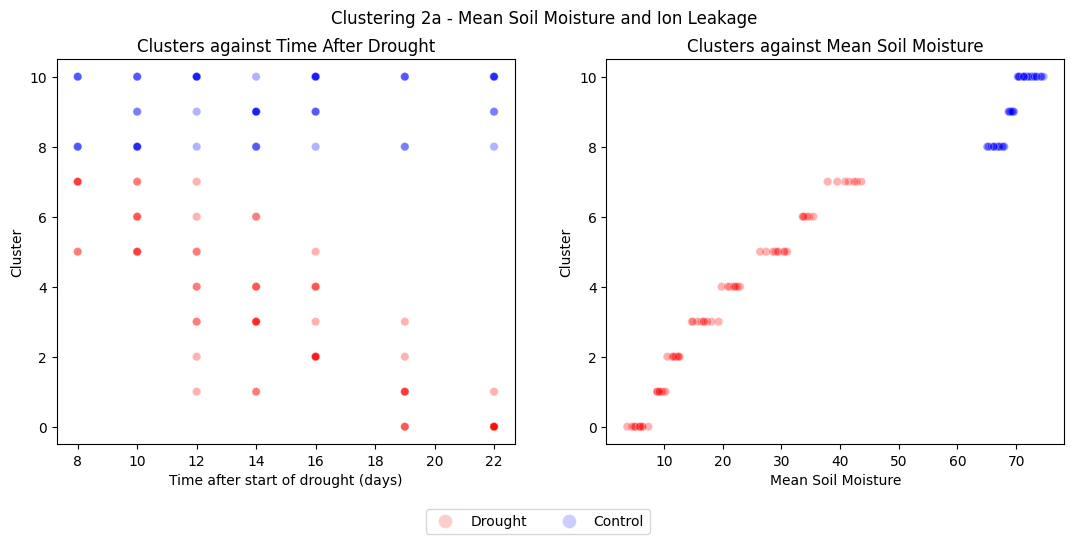

In [9]:
#Code for visualising clusters against a parameter, but with reordered clusters
#Setup figures
fig, axes = plt.subplots(1, 2,  figsize=(13, 5))
fig.suptitle('Clustering 2a - Mean Soil Moisture and Ion Leakage')
custom_palette = {"Control": "blue", "Drought": "red"}
#new_order = [0,1,2,3,4,5,6,7,8,9,10]
new_order = [5,0,7, 6,  2, 1, 3, 4, 8, 10,9]

#Plot clusters against time after drought
axes[0].set_title('Clusters against Time After Drought')
j = 0
for i in new_order:
    df_filtered = df[clusters == j]
    j += 1
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[0], data=filtered_df2, x='Time', y=i, hue = 'Condition', palette=custom_palette, alpha=0.3,legend=False)
axes[0].set_xlabel('Time after start of drought (days)')
axes[0].set_ylabel('Cluster')

#Plot clusters against a parameter
comp_parameter = 'Wet_Mean' #comparison parameter
axes[1].set_title('Clusters against Mean Soil Moisture')
j = 0
for i in new_order:
    df_filtered = df[clusters == j]
    j += 1
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[1], data=filtered_df2, x=comp_parameter, y=i, hue = 'Condition', palette=custom_palette, alpha=0.3)
axes[1].set_xlabel('Mean Soil Moisture')
axes[1].set_ylabel('Cluster')

print(df2)

#Set up legends
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, alpha=0.2, label='Drought'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, alpha=0.2, label='Control')]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(-0.15, -0.15), ncol=3)


      Wet_Mean  Mean RWC
0    66.366667  0.851852
1    55.766667  0.875000
4    69.100000  0.833333
5    71.733333  0.826667
6    64.166667  0.855263
..         ...       ...
209   4.566667  0.682620
210  71.300000  0.785317
211  63.066667  0.776834
212   5.866667  0.686819
213   6.400000  0.713454

[172 rows x 2 columns]
The average silhouette_score is : 0.6150890821248549
Number of clusters formed is :  5


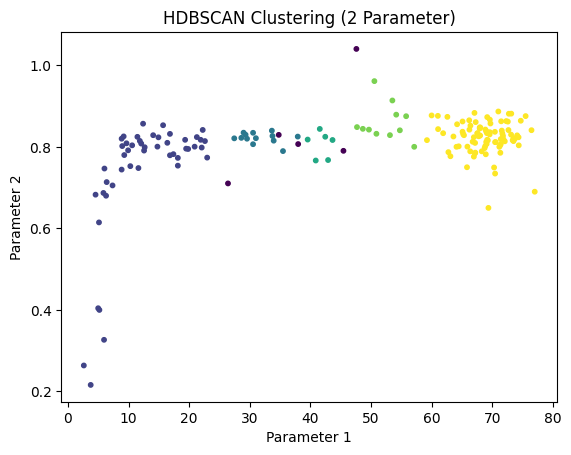

In [63]:
import pandas as pd
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D

# Load the CSV file into a DataFrame with headers and specify encoding
csv = pd.read_csv('Aggregated_data_E2.csv', encoding='latin1')

#create two dataframes from dataset
df=csv
df2=csv

#setup columns of interest
columns = [18, 45] #clustering parameters
columns2 = [1, 2, 17, 18, 45, 108] #paramters of interest, 1 = Condition, 2 = Time, 17=Ion Leakage, 18 = Soil Moisture, 45 = Mean RWC, 108 = Mean Leaef Thickness

#filter df and df2 according to columns
df = df.iloc[:, columns]
df2 = df2.iloc[:, columns2] 

#remove rows that don't have values for all clustering parameters
df = df.dropna()

# Display the DataFrame
print(df)

# Perform HDBSCAN clustering
## https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
#clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, metric='hamming', alpha=1.0) #hdbscan using hamming distance instead of Euclidean (unused)
clusterer = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=5, metric='euclidean', alpha=1.0) #change 'min_cluster_size' and 'min_samples' to control clusters formed
clusters = clusterer.fit_predict(df)

# Compute silhouette score
silhouette_avg = silhouette_score(df, clusters)
print("The average silhouette_score is :", silhouette_avg)

# Apply PCA for dimensionality reduction (for 3 parameters and up)
#pca = PCA(n_components=2)
#components = pca.fit_transform(df)

#print number of clusters formed
unique_clusters = np.unique(clusters)
print("Number of clusters formed is : ", len(unique_clusters)-1) #-1 to account for noise cluster, which has a value of '-1' in 'clusters'

#Filter time column to plot clusters against
cluster_times = df2.loc[df.index]

# Create a scatter plot of the clustered data
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='viridis', marker='o', s=10)
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
plt.title('HDBSCAN Clustering (2 Parameter)')

plt.show()


    Condition  Time     C1/C2   Wet_Mean  Mean RWC  Mean_Thickness
0     Control     1       NaN  66.366667  0.851852             NaN
1     Control     1       NaN  55.766667  0.875000             NaN
2     Control     1       NaN  69.200000       NaN             NaN
3     Control     1       NaN  67.166667       NaN             NaN
4     Control     1       NaN  69.100000  0.833333             NaN
..        ...   ...       ...        ...       ...             ...
209   Drought    22  0.351037   4.566667  0.682620           0.165
210   Control    22  0.423453  71.300000  0.785317           0.525
211   Control    22  0.257563  63.066667  0.776834           0.230
212   Drought    22  0.331507   5.866667  0.686819           0.215
213   Drought    22  0.341560   6.400000  0.713454           0.195

[214 rows x 6 columns]


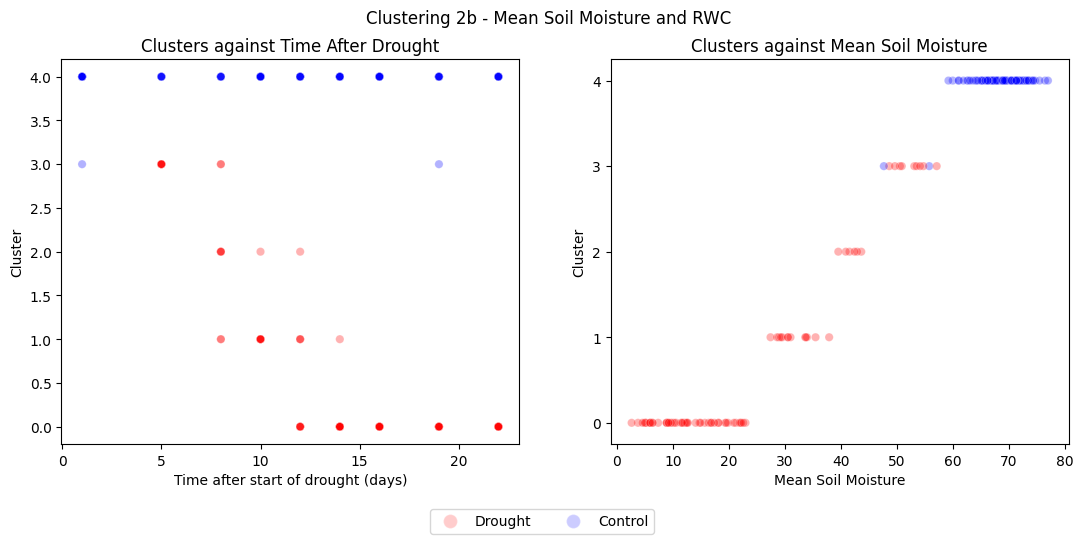

In [27]:
#Code for visualising clusters against a parameter, but with reordered clusters
#Setup figures
fig, axes = plt.subplots(1, 2,  figsize=(13, 5))
fig.suptitle('Clustering 2b - Mean Soil Moisture and RWC')
custom_palette = {"Control": "blue", "Drought": "red"}
#new_order = [0,1,2,3,4,5]
new_order = [0,1,2,3,4]

#Plot clusters against time after drought
axes[0].set_title('Clusters against Time After Drought')
j = 0
for i in new_order:
    df_filtered = df[clusters == j]
    j += 1
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[0], data=filtered_df2, x='Time', y=i, hue = 'Condition', palette=custom_palette, alpha=0.3,legend=False)
axes[0].set_xlabel('Time after start of drought (days)')
axes[0].set_ylabel('Cluster')

#Plot clusters against a parameter
comp_parameter = 'Wet_Mean' #comparison parameter
axes[1].set_title('Clusters against Mean Soil Moisture')
j = 0
for i in new_order:
    df_filtered = df[clusters == j]
    j += 1
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[1], data=filtered_df2, x=comp_parameter, y=i, hue = 'Condition', palette=custom_palette, alpha=0.3)
axes[1].set_xlabel('Mean Soil Moisture')
axes[1].set_ylabel('Cluster')
axes[1].set_ylim(-0.25, 4.25)
axes[1].set_yticks(np.arange(0, 5, 1))

print(df2)

#Set up legends
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, alpha=0.2, label='Drought'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, alpha=0.2, label='Control')]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(-0.15, -0.15), ncol=3)


      Wet_Mean  Mean_Thickness
5    71.733333           0.000
6    64.166667           0.000
12   59.966667           0.100
13   62.733333           0.120
14   62.566667           0.000
..         ...             ...
209   4.566667           0.165
210  71.300000           0.525
211  63.066667           0.230
212   5.866667           0.215
213   6.400000           0.195

[151 rows x 2 columns]
The average silhouette_score is : 0.5869851547366455
Number of clusters formed is :  10


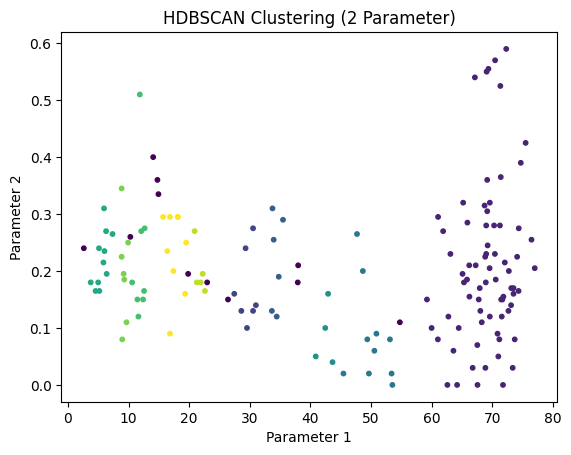

In [65]:
import pandas as pd
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D

# Load the CSV file into a DataFrame with headers and specify encoding
csv = pd.read_csv('Aggregated_data_E2.csv', encoding='latin1')

#create two dataframes from dataset
df=csv
df2=csv

#setup columns of interest
columns = [18, 108] #clustering parameters
columns2 = [1, 2, 17, 18, 45, 108] #paramters of interest, 1 = Condition, 2 = Time, 17=Ion Leakage, 18 = Soil Moisture, 45 = Mean RWC, 108 = Mean Leaef Thickness

#filter df and df2 according to columns
df = df.iloc[:, columns]
df2 = df2.iloc[:, columns2] 

#remove rows that don't have values for all clustering parameters
df = df.dropna()

# Display the DataFrame
print(df)

# Perform HDBSCAN clustering
## https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
#clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, metric='hamming', alpha=1.0) #hdbscan using hamming distance instead of Euclidean (unused)
clusterer = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=4, metric='euclidean', alpha=1.0) #change 'min_cluster_size' and 'min_samples' to control clusters formed
clusters = clusterer.fit_predict(df)

# Compute silhouette score
silhouette_avg = silhouette_score(df, clusters)
print("The average silhouette_score is :", silhouette_avg)

# Apply PCA for dimensionality reduction (for 3 parameters and up)
#pca = PCA(n_components=2)
#components = pca.fit_transform(df)

#print number of clusters formed
unique_clusters = np.unique(clusters)
print("Number of clusters formed is : ", len(unique_clusters)-1) #-1 to account for noise cluster, which has a value of '-1' in 'clusters'

#Filter time column to plot clusters against
cluster_times = df2.loc[df.index]

# Create a scatter plot of the clustered data
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='viridis', marker='o', s=10)
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
plt.title('HDBSCAN Clustering (2 Parameter)')

plt.show()


    Condition  Time     C1/C2   Wet_Mean  Mean RWC  Mean_Thickness
0     Control     1       NaN  66.366667  0.851852             NaN
1     Control     1       NaN  55.766667  0.875000             NaN
2     Control     1       NaN  69.200000       NaN             NaN
3     Control     1       NaN  67.166667       NaN             NaN
4     Control     1       NaN  69.100000  0.833333             NaN
..        ...   ...       ...        ...       ...             ...
209   Drought    22  0.351037   4.566667  0.682620           0.165
210   Control    22  0.423453  71.300000  0.785317           0.525
211   Control    22  0.257563  63.066667  0.776834           0.230
212   Drought    22  0.331507   5.866667  0.686819           0.215
213   Drought    22  0.341560   6.400000  0.713454           0.195

[214 rows x 6 columns]


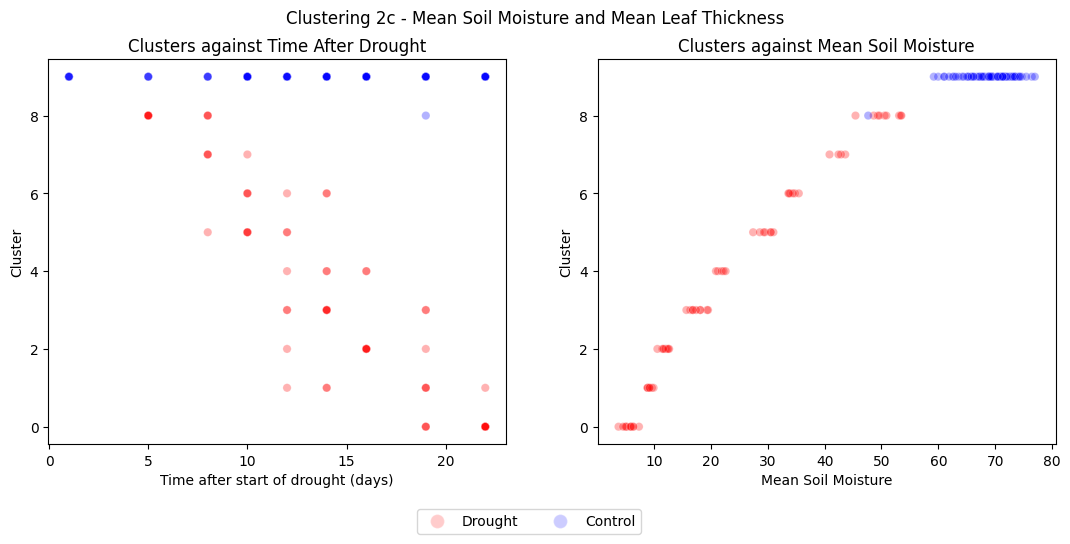

In [22]:
#Code for visualising clusters against a parameter, but with reordered clusters
#Setup figures
fig, axes = plt.subplots(1, 2,  figsize=(13, 5))
fig.suptitle('Clustering 2c - Mean Soil Moisture and Mean Leaf Thickness')
custom_palette = {"Control": "blue", "Drought": "red"}
#new_order = [0,1,2,3,4,5,6,7,8,9]
new_order = [9,5,6,8,7,0,2,1,4,3]

#Plot clusters against time after drought
axes[0].set_title('Clusters against Time After Drought')
j = 0
for i in new_order:
    df_filtered = df[clusters == j]
    j += 1
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[0], data=filtered_df2, x='Time', y=i, hue = 'Condition', palette=custom_palette, alpha=0.3,legend=False)
axes[0].set_xlabel('Time after start of drought (days)')
axes[0].set_ylabel('Cluster')

#Plot clusters against a parameter
comp_parameter = 'Wet_Mean' #comparison parameter
axes[1].set_title('Clusters against Mean Soil Moisture')
j = 0
for i in new_order:
    df_filtered = df[clusters == j]
    j += 1
    filtered_df2 = df2.loc[df_filtered.index]
    sns.scatterplot(ax=axes[1], data=filtered_df2, x=comp_parameter, y=i, hue = 'Condition', palette=custom_palette, alpha=0.3)
axes[1].set_xlabel('Mean Soil Moisture')
axes[1].set_ylabel('Cluster')

print(df2)

#Set up legends
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, alpha=0.2, label='Drought'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, alpha=0.2, label='Control')]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(-0.15, -0.15), ncol=3)
